In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

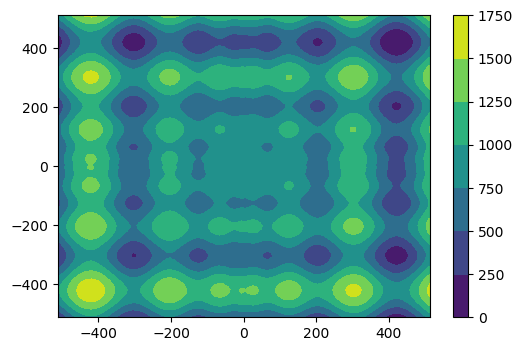

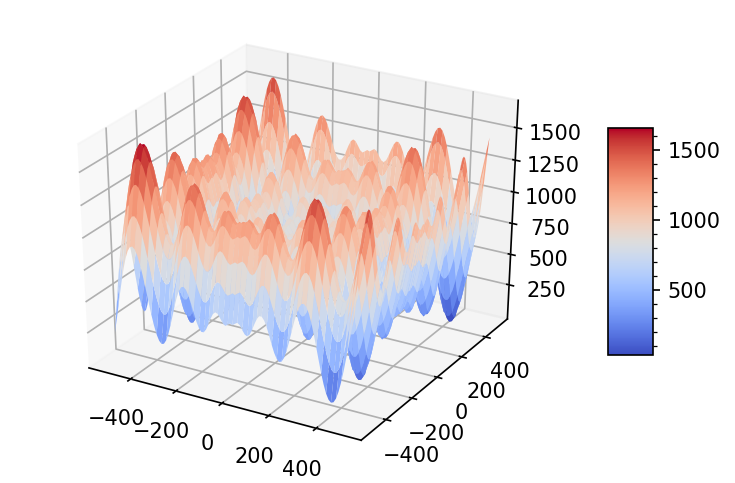

[-124.83200749 -302.52501077] 414.54507473514565


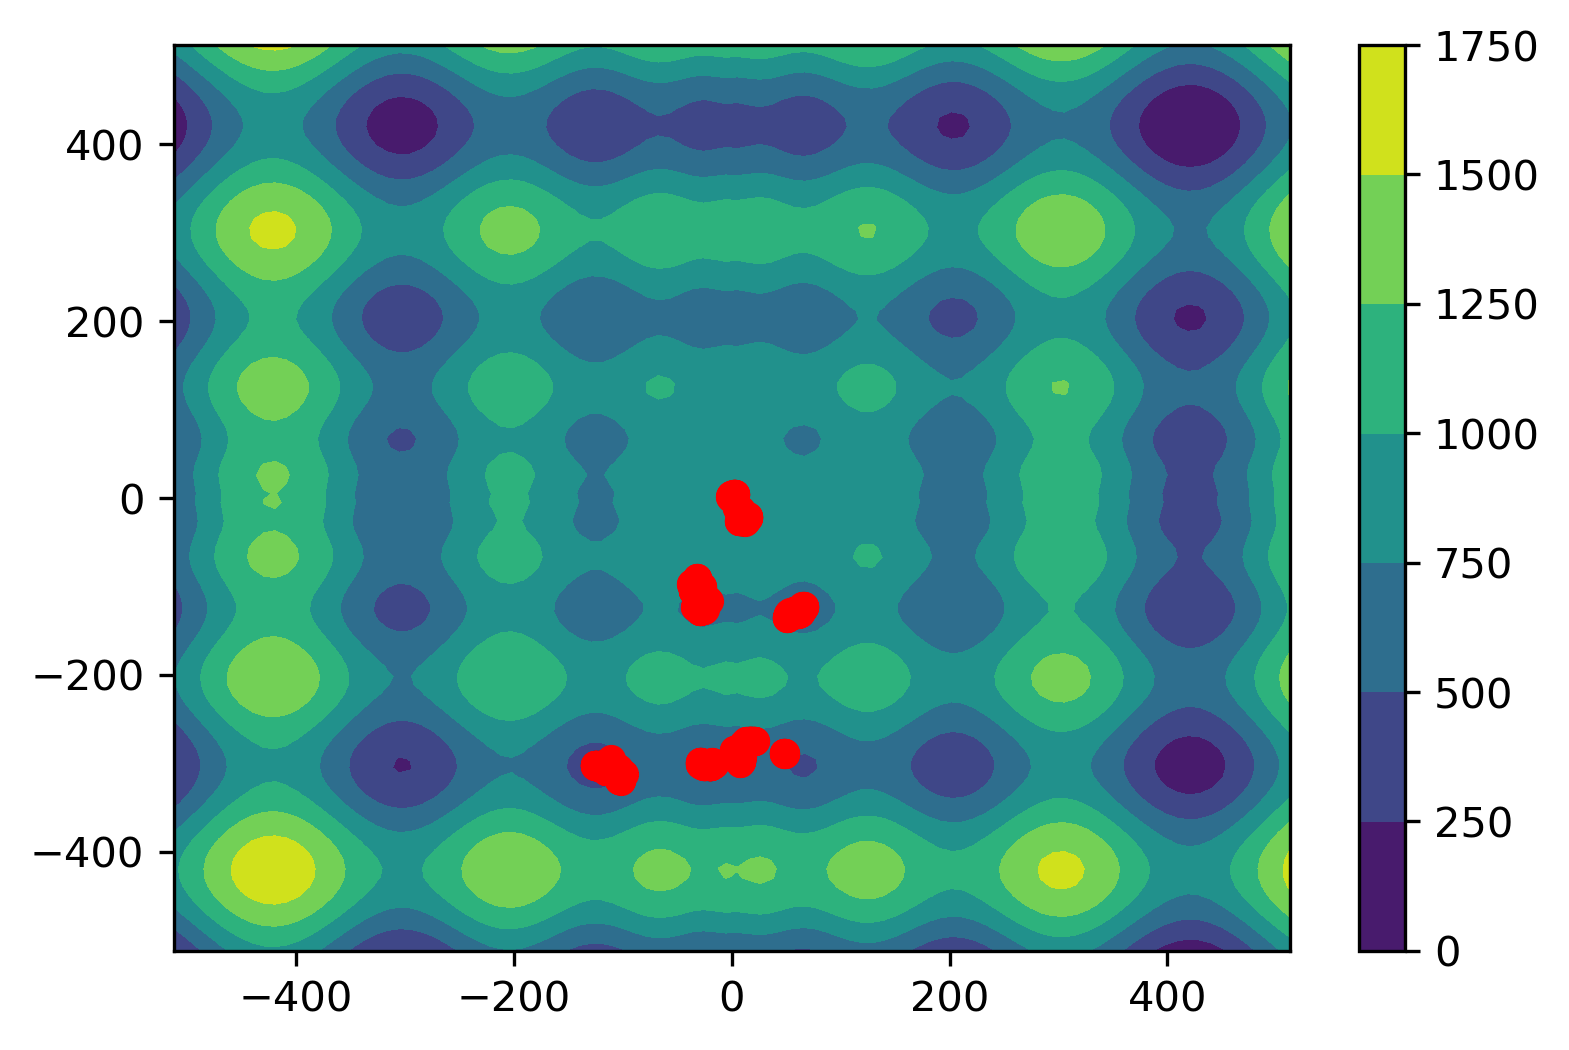

In [9]:
def f_fun(x):
    return 418.9829 * 2 - (x[0] * np.sin(abs(x[0]) ** 0.5) + x[1] * np.sin(abs(x[1]) ** 0.5))

def x_fun(x):
    return 0.2 * np.random.randn(len(x)) + x

N_r = 512
x = np.linspace(-N_r,N_r,100)
y = np.linspace(-N_r,N_r,100)
X, Y = np.meshgrid(x, y)
Z = 418.9829*2 - (X*np.sin(abs(X) ** 0.5) + Y*np.sin(abs(Y) ** 0.5))
plt.figure(num=None,dpi=100)
plt.contourf(X,Y,Z)
plt.colorbar()
plt.show()


cplot = plt.figure(num=None,dpi=150)
ax = cplot.add_subplot(111,projection='3d')
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)
cbar = cplot.colorbar(surf, shrink=0.5, aspect=5)
cbar.minorticks_on()
plt.show()

t = 1
q = 0.9
T = 100
T_min = 1e-3
N = 10000
x = [0,0]
f1 = f_fun(x)
x_glob, f_glob = x, f1
hx = []
hy = []

while T > T_min:
    for i in range(N):

        x2 = x_fun(x)
        f2 = f_fun(x2)

        if f2 < f_glob:
            x_glob, f_glob = x2, f2
            hx.append(x_glob[0])
            hy.append(x_glob[1])

        df = f2 - f1
        if df < 0 or np.exp(-df / T) > np.random.rand():
            x, f1 = x2, f2

    T -= 0.1
print(x_glob, f_glob)

plt.figure(num=None,dpi=300)
plt.contourf(X,Y,Z)
plt.colorbar()
plt.scatter(hx, hy, color='r')
plt.show()